# Mock Hackathon

Objectives:
1. Train a model on the data
2. Perform threshold analysis
3. 

In [165]:
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [166]:
df_train = pd.read_csv(os.path.join('data','history.csv'), low_memory=False)
print(df_train.shape)
df_train.head(3)

(33412, 28)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
2,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good


In [167]:
def replace_by_avg(col):
    average_age = df_train[col].mean()
    df_train[col].fillna(average_age, inplace=True)
    df_train[col] = df_train[col].round().astype(int)

In [168]:
df_train = df_train.drop(['Customer_ID', 'ID', "SSN", "Name", 'Month', 'Type_of_Loan', "Changed_Credit_Limit", 'Monthly_Inhand_Salary'], axis=1)

df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].apply(lambda x: None if x == "!@9#%8" else x)
df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].ffill().bfill()

df_train = pd.get_dummies(df_train, columns=["Occupation", "Payment_of_Min_Amount", "Credit_Mix", "Payment_Behaviour"], drop_first=True)

month_to_num = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}
# df_train["Month"] = df_train["Month"].map(month_to_num)

df_train["Credit_History_Age"] = df_train["Credit_History_Age"].ffill().bfill().apply(lambda x: int(x.split(" ")[0]) * 365 + int(x.split(" ")[3]) * 30)

df_train["Age"] = pd.to_numeric(df_train["Age"], errors='coerce')
# df_train["Month"] = pd.to_numeric(df_train["Month"], errors='coerce')
df_train["Annual_Income"] = pd.to_numeric(df_train["Annual_Income"], errors='coerce')
df_train["Num_of_Delayed_Payment"] = pd.to_numeric(df_train["Num_of_Delayed_Payment"], errors='coerce')
df_train["Num_of_Loan"] = pd.to_numeric(df_train["Num_of_Loan"], errors='coerce')
# df_train["Changed_Credit_Limit"] = pd.to_numeric(df_train["Changed_Credit_Limit"], errors='coerce')
df_train["Outstanding_Debt"] = pd.to_numeric(df_train["Outstanding_Debt"], errors='coerce')
df_train["Amount_invested_monthly"] = pd.to_numeric(df_train["Amount_invested_monthly"], errors='coerce')
df_train["Monthly_Balance"] = pd.to_numeric(df_train["Monthly_Balance"], errors='coerce')
# df_train["Monthly_Inhand_Salary"] = pd.to_numeric(df_train["Monthly_Inhand_Salary"], errors='coerce')

mean_value = df_train['Num_Bank_Accounts'][df_train['Num_Bank_Accounts'] >= 0].mean()
df_train['Num_Bank_Accounts'] = df_train['Num_Bank_Accounts'].apply(lambda x: mean_value if x < 0 else x)

mean_value = df_train['Delay_from_due_date'][df_train['Delay_from_due_date'] >= 0].mean()
df_train['Delay_from_due_date'] = df_train['Delay_from_due_date'].apply(lambda x: mean_value if x < 0 else x)


df_train.loc[(df_train['Age'] < 0) | (df_train['Age'] > 110), 'Age'] = None
# df_train.loc[(df_train['Month' ] < 1) | (df_train['Month'] > 12), 'Month'] = None
df_train.loc[(df_train['Annual_Income'] < 0), 'Annual_Income'] = None
df_train.loc[(df_train['Num_of_Delayed_Payment'] < 0), 'Num_of_Delayed_Payment'] = None
df_train.loc[(df_train['Num_of_Loan'] < 0), 'Num_of_Loan'] = None
# df_train.loc[(df_train['Changed_Credit_Limit'] < 0), 'Changed_Credit_Limit'] = None
df_train.loc[(df_train['Outstanding_Debt'] < 0), 'Outstanding_Debt'] = None
df_train.loc[(df_train['Amount_invested_monthly'] < 0), 'Amount_invested_monthly'] = None
df_train.loc[(df_train['Monthly_Balance'] < 0), 'Monthly_Balance'] = None
# df_train.loc[(df_train['Monthly_Inhand_Salary'] < 0), 'Monthly_Inhand_Salary'] = None

replace_by_avg("Age")
# replace_by_avg("Month")
replace_by_avg("Annual_Income")
replace_by_avg("Num_of_Delayed_Payment")
replace_by_avg("Num_of_Loan")
# replace_by_avg("Changed_Credit_Limit")
replace_by_avg("Outstanding_Debt")
replace_by_avg("Amount_invested_monthly")
replace_by_avg("Monthly_Balance")
# replace_by_avg("Monthly_Inhand_Salary")

# sns.heatmap(df_train)
# df_train.fillna(df_train.mean(), inplace=True)
df_train = df_train.ffill().bfill()


# Prepare data
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_train['Credit_Score'] = df_train['Credit_Score'].map(target_mapping)




C:\Users\Utilizador\AppData\Local\Temp\ipykernel_10256\929007241.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(average_age, inplace=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_10256\929007241.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



# Exercise 1

Train a model on this data and perform threshold analysis

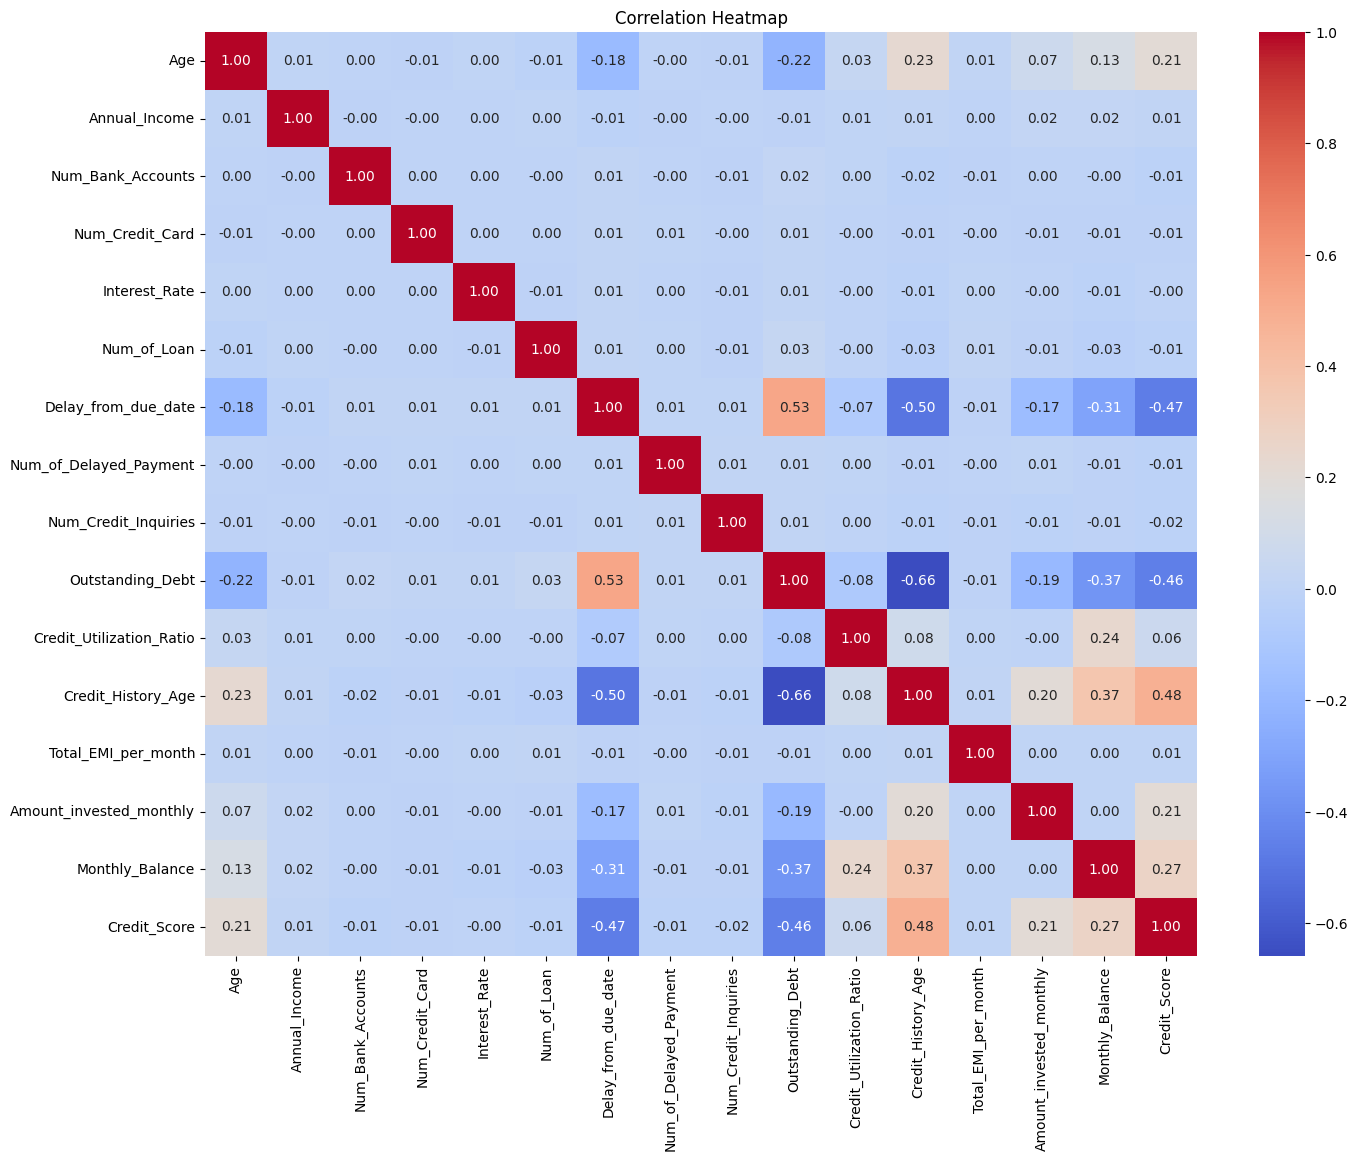

In [169]:
# X = df_train.drop("Credit_Score", axis=1)
import matplotlib.pyplot as plt

numerical_features = df_train.select_dtypes(include=['number']) #What is this doing?

plt.figure(figsize=(16, 12))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [170]:
# standartizer = StandardScaler()
# df_train["Annual_Income"] = standartizer.fit_transform(df_train[["Annual_Income"]])

df_train["Credit_Score"]





0        2
1        2
2        2
3        2
4        2
        ..
33407    0
33408    0
33409    0
33410    0
33411    0
Name: Credit_Score, Length: 33412, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
import xgboost as xgb
from tpot import TPOTClassifier


# rforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Hyperparameter grid for Logistic Regression
params = {
    'objective': 'multi:softmax',  # Use 'multi:softprob' for probabilities
    'num_class': 3,               # Number of classes
    'eval_metric': 'mlogloss',    # Multi-class log loss
    'max_depth': 6,               # Maximum tree depth
    'eta': 0.3,                   # Learning rate
    'subsample': 0.8,             # Fraction of data to use per tree
    'colsample_bytree': 0.8       # Fraction of features to use per tree
}


# Standardization and Normalization functions
def standartize(col):
    df_train[col] = standartizer.fit_transform(df_train[[col]])

def normalize(col):
    df_train[col] = normalizer.fit_transform(df_train[[col]])

# Initialize scalers
standartizer = StandardScaler()
normalizer = MinMaxScaler()

# Apply scaling
standartize("Annual_Income")
# standartize("Monthly_Inhand_Salary")
standartize("Interest_Rate")
standartize("Credit_History_Age")
standartize("Total_EMI_per_month")
standartize("Amount_invested_monthly")
standartize("Monthly_Balance")
standartize("Outstanding_Debt")

normalize("Num_Bank_Accounts")
normalize("Num_Credit_Card")
normalize("Num_of_Loan")
normalize("Num_of_Delayed_Payment")
normalize("Num_Credit_Inquiries")
# normalize("Month")
normalize("Age")
normalize("Credit_Utilization_Ratio")
# normalize("Changed_Credit_Limit")
normalize("Delay_from_due_date")



X = df_train.drop(['Credit_Score'], axis=1)
y = df_train['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensions
# pca = PCA(n_components=0.99)  # Keeps 95% of variance
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# model = xgb.train(params, dtrain, num_boost_round=100)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
y_pred = tpot.predict(X_test)


bst = xgb.train(params, dtrain, num_boost_round=100)
y_pred = bst.predict(dtest)



accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')  # Use 'macro' or 'weighted' for multi-class
print(f"F2 Score: {f2}")


Optimization Progress:  19%|█▉        | 23/120 [03:50<12:11,  7.54s/pipeline]  

# Exercise 2

Assume the cost of a False positive is 30€ and the benefit of a True Positive is 70€, create a submission that maximizes for this.

# Exercise 3

Evaluate the fairness of your model using [aequitas](https://github.com/dssg/aequitas)

In [164]:
from 

SyntaxError: invalid syntax (681706079.py, line 1)